<a href="https://colab.research.google.com/github/germfsip/2231Procesamiento-digital-de-imagenes/blob/main/PDI_Clase_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Operaciones con una imagen

##Dr. Gerardo Martinez

Bibliotecas

In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Cargar imagen

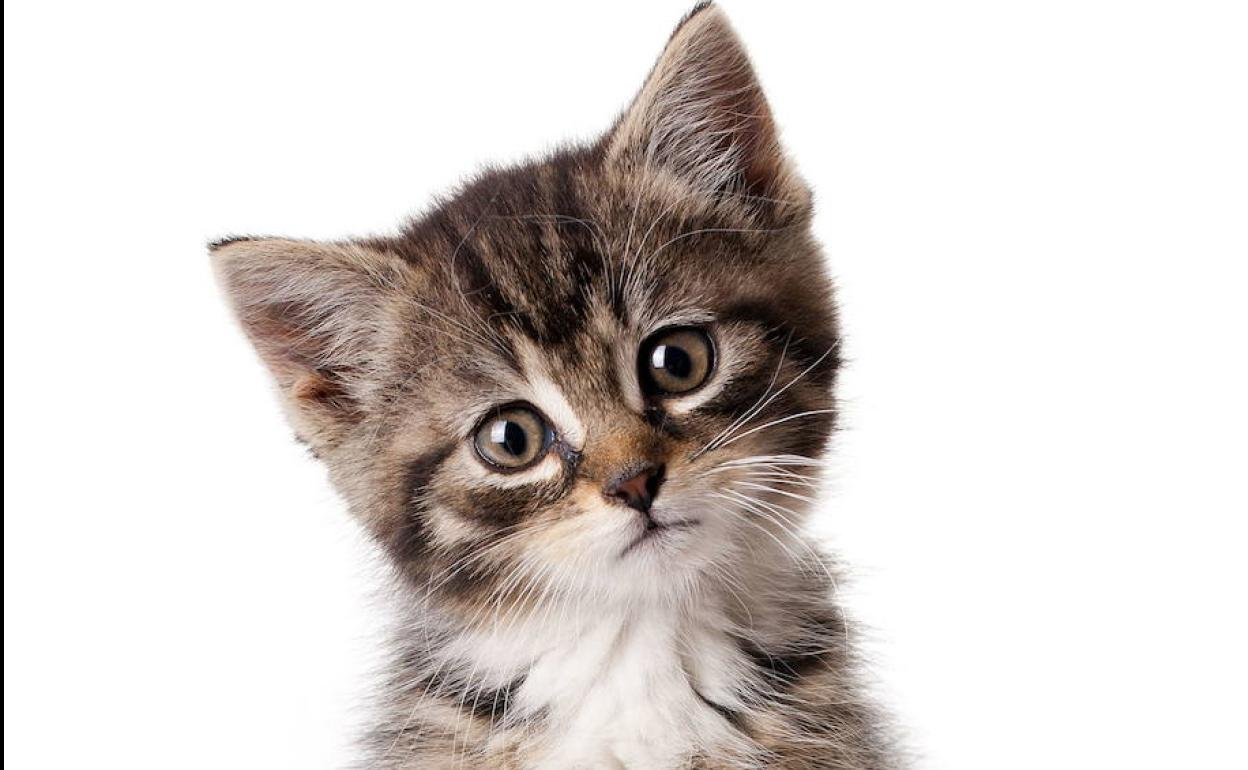

Tamaño =  (770, 1248, 3)
Alto =  770
Ancho =  1248
Valor max  =  255
Valor min  =  0


In [ ]:
img= cv2.imread("gato.jpg")
cv2_imshow(img)


def medidas(imagen):
  print('Tamaño = ',imagen.shape)
  print('Alto = ',imagen.shape [0])
  print('Ancho = ',imagen.shape [1])
  print('Valor max  = ',np.max(imagen))
  print('Valor min  = ',np.min(imagen))

medidas(img)
alto = img.shape [0]
ancho = img.shape [1]

#Trasladando una imagen
Aplicar traslación a una imagen quiere decir que esta cambiará de ubicación, realizando desplazamiento en el eje x, y o ambos.

¿Cómo trasladar una imagen con OpenCV?, para poder trasladar una imagen usando OpenCV, debemos recordar que este trabaja bajo coordenadas, x e y. El eje x empieza desde la parte superior izquierda de la imagen hacía la derecha, mientras que el eje y estará presente desde la parte superior izquierda hacía abajo
Para aplicar esta transformación geométrica (traslación) necesitaremos de: matriz M y de la función cv2.warpAffine.

\M=\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix} + \begin{bmatrix}
tx\\
ty
\end{bmatrix}

Matriz M
Esta es una matriz de 2 x 3, en donde la primera fila tercera columna estará el componente en x, y en la segunda fila tercera columna estará el componente en y.


tx, representa el desplazamiento en x.

ty, representa el desplazamiento en y.

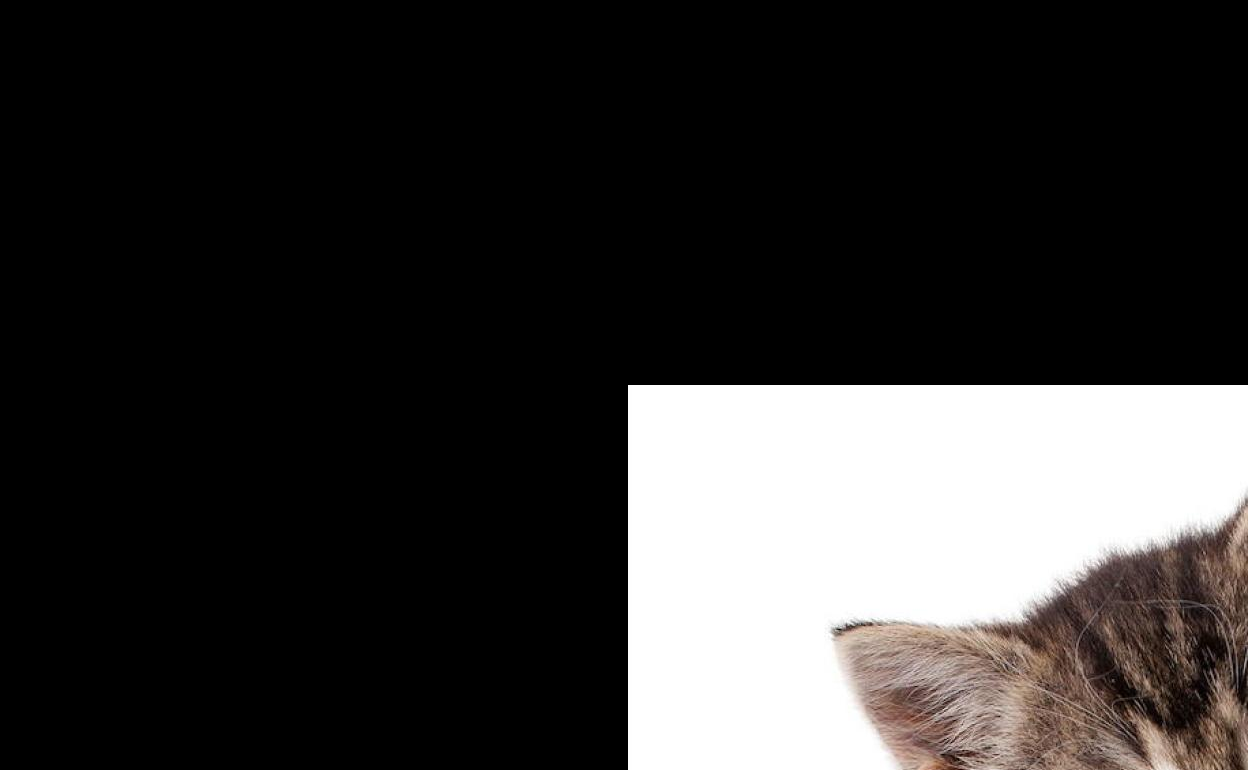

El valor intermedio en la salida:  [0 0 0]
El valor entrada :  [255 255 255]


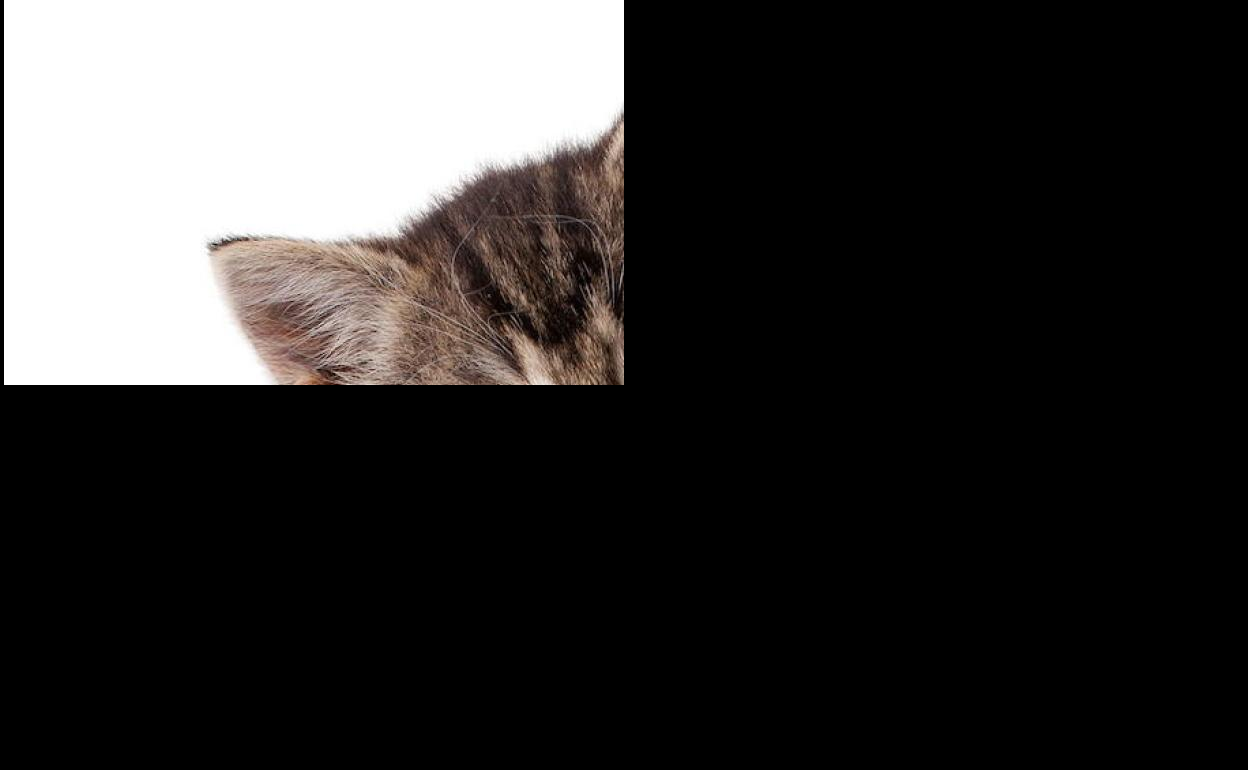

In [ ]:
M = np.float32([[1,0,ancho/2],[0,1,alto/2]])
sal= cv2.warpAffine(img, M,(ancho,alto))

cv2_imshow(sal)

print("El valor intermedio en la salida: ", sal[20,50])

print("El valor entrada : ", img[20,50])

M = np.float32([[1,0,-(ancho/2)],[0,1,-(alto/2)]])
sal2= cv2.warpAffine(sal, M,(ancho,alto))

cv2_imshow(sal2)


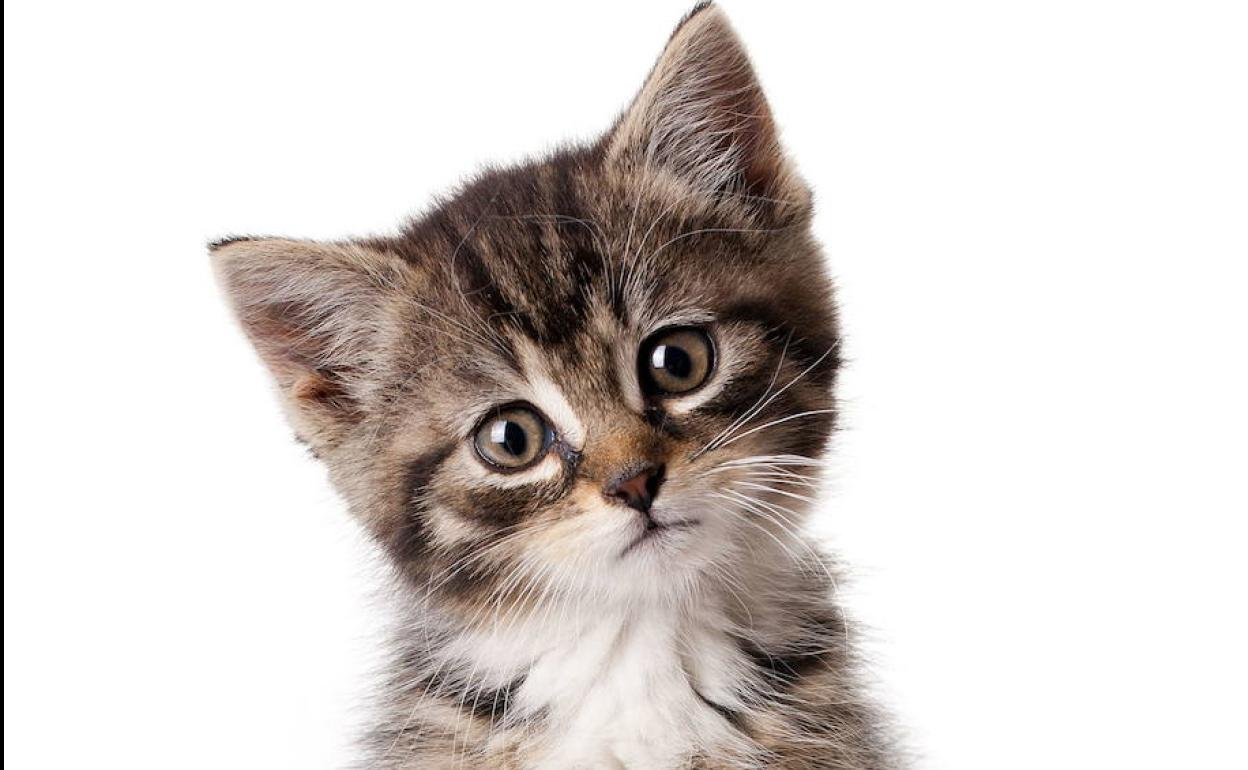

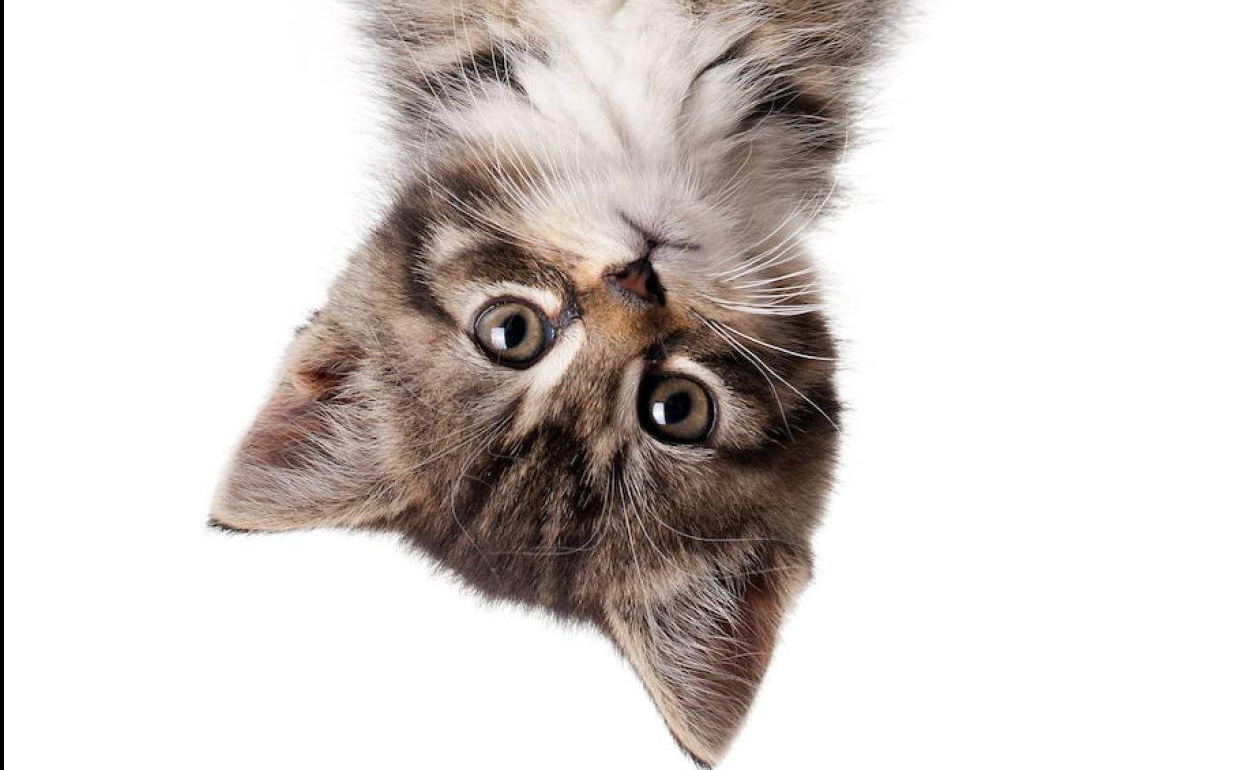

In [ ]:
M_refl = np.float32([[1,0,0],[0,1,0]])
sal3= cv2.warpAffine(img, M_refl,(ancho,alto))

cv2_imshow(sal3)

for i in range(alto):
    for j in range(ancho):
        sal[i,j] = sal3[alto-1 - i,j]

cv2_imshow(sal)


#Rotando una imagen
¿Cómo rotar una imagen usando OpenCV? Al igual que con la traslación, vamos a necesitar una matriz en donde se especifique el ángulo de rotación a la que va a ser sometida la imagen, para ello vamos a usar la función cv2.getRotationMatrix2D y posteriormente cv2.warpAffine. Esta última función ya fue explicada en el apartado anterior, por lo tanto nos centraremos en como obtener la matriz de rotación.

#cv2.getRotationMatrix2D
Esta función calcula una matriz afín de rotación 2D, además permite ajustar el centro de rotación, así como la escala de la imagen.

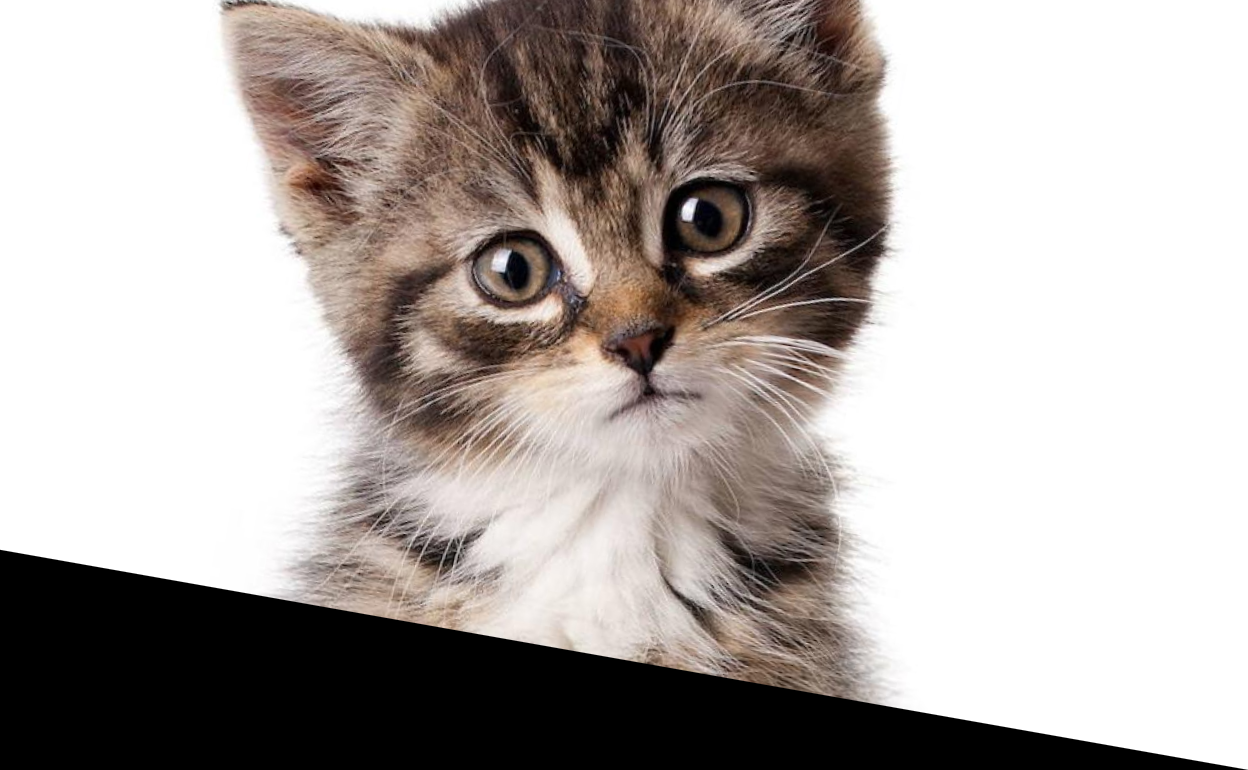

In [ ]:
#M_rot= cv2.getRotationMatrix2D((ancho//2, alto//2),10,1)
#M_rot= cv2.getRotationMatrix2D((0,0),10,1)
M_rot= cv2.getRotationMatrix2D((ancho,alto),-10,1.1)
sal= cv2.warpAffine(img, M_rot,(ancho,alto))

cv2_imshow(sal)

#Colocar texto en una imagen

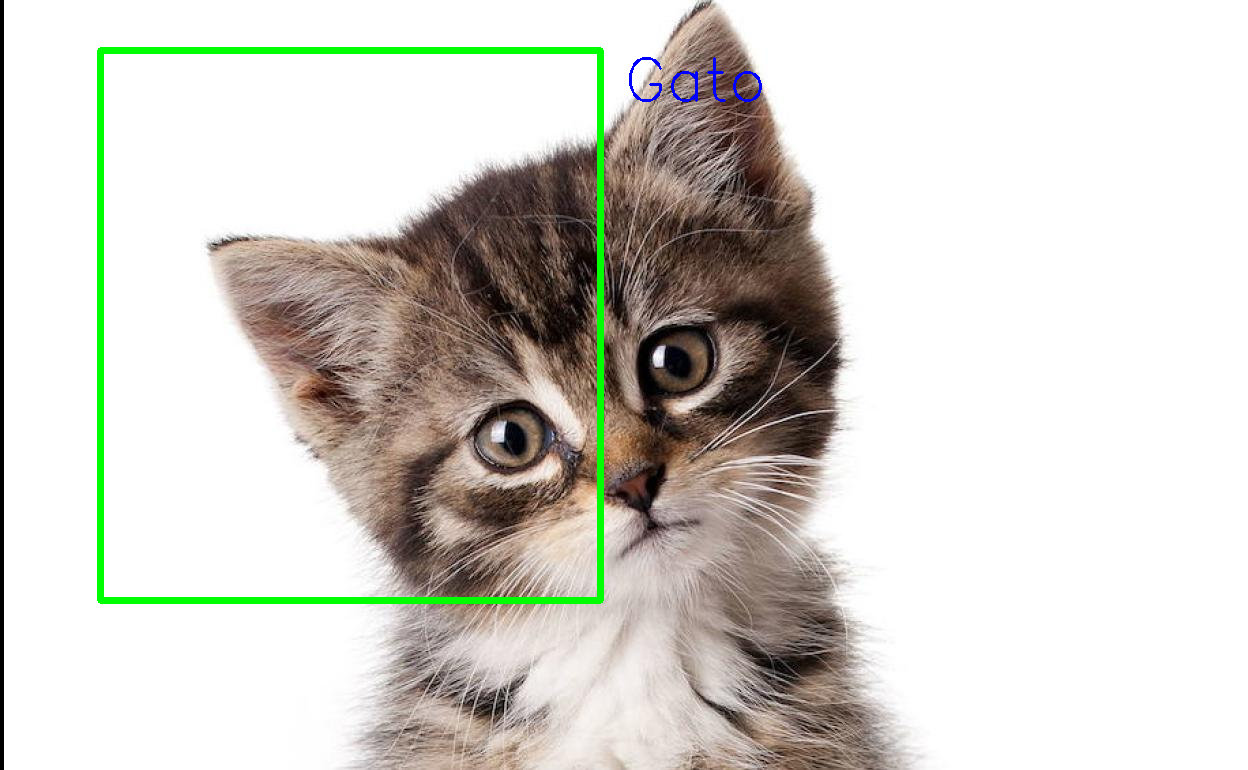

In [ ]:
cv2.putText(img, "Gato", (ancho//2, 100), cv2.FONT_ITALIC, 2, (255,0,0), 2)
cv2.rectangle(img, (100,50), (600,600), (0,255,0), 5)
cv2_imshow(img)